# Titanic: Machine Learning from Disaster

#### This notebook is for predicting the Titanic Disaster Survivours.

#### Importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Stop warning
import warnings
warnings.filterwarnings('ignore')

#### Reading dataset

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Exploratory Data Analysis

#### Viewing the top 5 row

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.shape

(891, 12)

### Data Celaning

#### Viewing number of NULL in train dataset

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Imputing the Age column

In [9]:
train['Age'].fillna(train['Age'].median(),inplace=True)

test['Age'].fillna(test['Age'].median(),inplace=True)

#### Removing the Cabin column

In [10]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

#### Imputing Embarked column
###### Replacing with 'S' which is most occurring

In [11]:
train['Embarked'].fillna('S',inplace=True)

#### Imputing Fare with median value

In [12]:
test['Fare'].fillna(test['Fare'].median(),inplace=True)

## ==================================== ##

#### Checking the data types of the dataset

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


#### Converting to 'Category' data type

##### Sex

In [14]:
train['Sex'] = train['Sex'].astype('category')
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
test['Sex'] = test['Sex'].astype('category')
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

##### Pclass

In [16]:
train['Pclass'] = train['Pclass'].astype('category')
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
test['Pclass'] = test['Pclass'].astype('category')
test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

##### Embarked

In [18]:
train['Embarked'] = train['Embarked'].astype('category')
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
test['Embarked'] = test['Embarked'].astype('category')
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

## ==================================== ##

### Analysis of individual variable in training data

##### Sex

In [20]:
## Checking no of rows of each Sex.
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0, 0.5, 'Count')

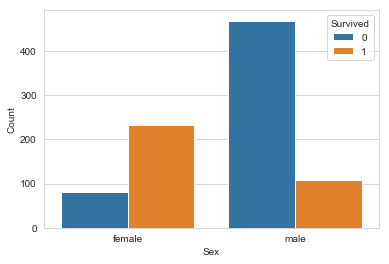

In [21]:
## Count of survival for each Pclass.
sns.set_style("whitegrid")
sns.countplot(x="Sex", hue="Survived", data=train)
plt.xlabel("Sex")
plt.ylabel("Count")

##### Pclass

In [22]:
## Checking no of rows of each Pclass type.
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

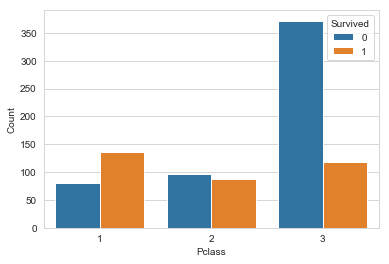

In [23]:
## Count of survival for each Pclass.
sns.set_style("whitegrid")
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

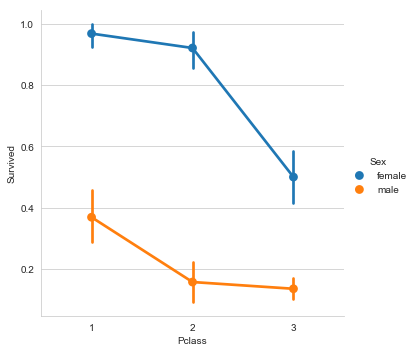

In [24]:
# Factorplot
sns.factorplot("Pclass", "Survived", hue = "Sex", data = train)
plt.show()

##### Embarked

In [25]:
## Checking no of rows of each Embarked type.
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Text(0, 0.5, 'Count')

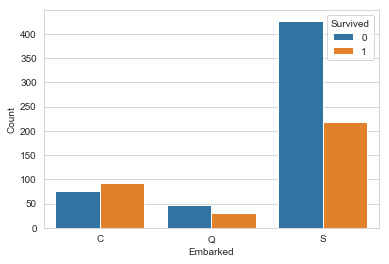

In [26]:
## Count of survival for each Embarked.
sns.set_style("whitegrid")
sns.countplot(x="Embarked", hue="Survived", data=train)
plt.xlabel("Embarked")
plt.ylabel("Count")

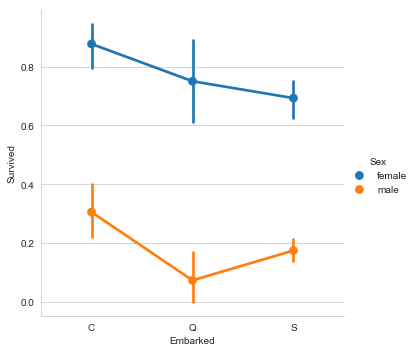

In [27]:
# Factorplot
sns.factorplot("Embarked", "Survived", hue = "Sex", data = train)
plt.show()

## ==================================== ##

#### Checking for outliers

## Machine Learning Modelling

### Checking Cross Validation Score for better model selection

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#### Creating Data and Target Dataset

In [29]:
X = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = train['Survived']

#### Converting 'Sex' column to 1 and 0

In [30]:
X["Sex"].replace(["male", "female"], [0, 1], inplace = True)

#### Creating Dummies

##### Embarked

In [31]:
X = X.join(pd.get_dummies(X['Embarked'], prefix='Embarked')).drop(['Embarked'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


#### Cross Validation Scores

##### Logistic Regression

In [32]:
cross_val_score(LogisticRegression(), X, y)

array([0.79124579, 0.78451178, 0.79124579])

##### Support Vector Machine

In [33]:
cross_val_score(SVC(), X, y)

array([0.64646465, 0.69360269, 0.72390572])

##### Random Forest 

In [34]:
cross_val_score(RandomForestClassifier(n_estimators = 100), X, y)

array([0.79461279, 0.82828283, 0.8013468 ])

Creating a data2 for RandomForest

###### *Since Random Forest gives better Cross Validation Score, it will be used for modelling

### Modelling

#### Importing important libraries

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Creating training and testing datasets

In [36]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=True)

#### Fitting the model

In [37]:
model = RandomForestClassifier(n_estimators=100,
                               max_leaf_nodes=12,
                               max_depth=12,
                               random_state=0)
model.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=12,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Checking accuracy of the model

In [38]:
test_predict = model.predict(test_X)
accuracy_score(test_y, test_predict)

0.7821229050279329

## ==================================== ##

## Submission Dataframe

In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [40]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [41]:
test_sub = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_sub.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


#### Converting 'Sex' column to 1 and 0

In [42]:
test_sub["Sex"].replace(["male", "female"], [0, 1], inplace = True)

#### Creating dummies

##### Embarked

In [43]:
test_sub = test_sub.join(pd.get_dummies(test_sub['Embarked'], prefix='Embarked')).drop(['Embarked'], axis=1)
test_sub.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


In [44]:
submission = pd.DataFrame()
submission["PassengerId"] = test["PassengerId"]
submission["Survived"] = model.predict(test_sub)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


#### Saving in a csv file

In [45]:
submission.to_csv("submission.csv", index=False)

In [46]:
submission.shape

(418, 2)

### Score of 0.78468 on kaggle